#### Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### 1. Implement and Visualize Activation Functions:

In [2]:
data = np.linspace(-10,10,100)

##### Step Function


Defining the function

In [3]:
def step(data):
  if data > 0:
    return 1
  else:
    return 0

Plotting the activation function on Data between -10 and 10

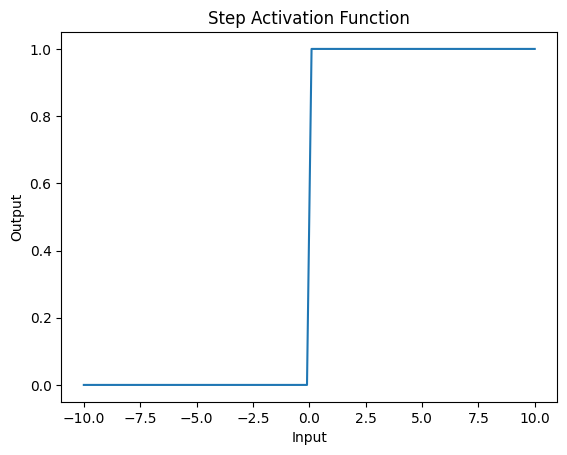

In [4]:
plt.plot(data, [step(x) for x in data])
plt.title('Step Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

##### Sigmoid Function (Binary and Bipolar)

Defining the function   
For Sigmoid Binary

In [5]:
def sigmoid(data):
  return 1/(1+np.exp(-data))

For Sigmoid Bipolar

In [6]:
def sigmoid_bipolar(data):
  return (1 - np.exp(-data)) / (1 + np.exp(-data))

Plotting the activation function on Data between -10 and 10

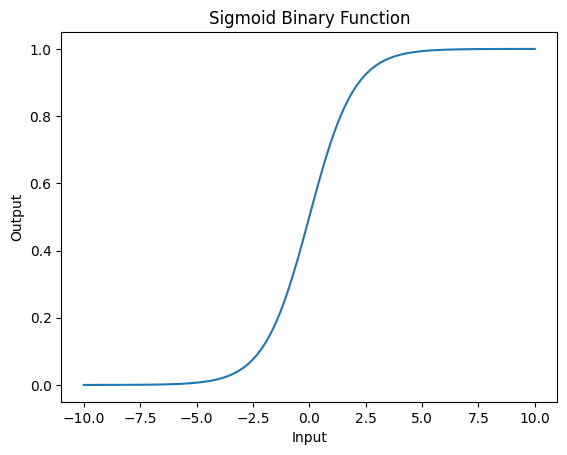

In [7]:
plt.plot(data, [sigmoid(x) for x in data])
plt.title('Sigmoid Binary Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

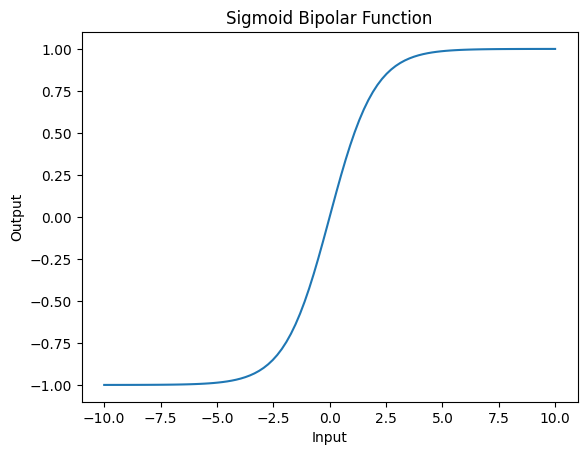

In [8]:
plt.plot(data, [sigmoid_bipolar(x) for x in data])
plt.title('Sigmoid Bipolar Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

##### Tanh Function

Defining the function

In [9]:
def tanh(data):
  return (np.exp(data)-np.exp(-data))/(np.exp(data)+np.exp(-data))

Plotting the activation function on Data between -10 and 10

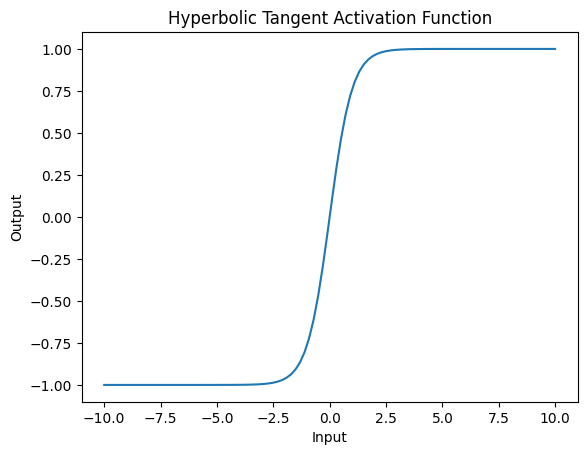

In [10]:
plt.plot(data, [tanh(x) for x in data])
plt.title('Hyperbolic Tangent Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

##### ReLU Function

Define the function

In [11]:
def relu(data):
  return np.maximum(0,data)

Plotting the Activation Function

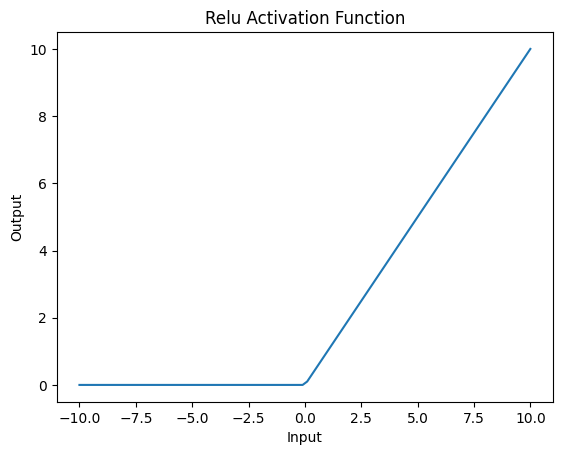

In [12]:
plt.plot(data, [relu(x) for x in data])
plt.title('Relu Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

#### 2. Implement a Simple Neural Network:

Load the Data

In [13]:
iris_data = load_iris()
x = iris_data.data
y = iris_data.target

In [14]:
print("Features")
print(x[:10])

Features
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [15]:
print("Output")
print(y)

Output
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Define the Neural Network

In [16]:
def forward_propagation(X, W1, b1, W2, b2, activation_func):
    result = np.dot(X, W1) + b1
    if activation_func == 'sigmoid':
        output_of_activation_function = sigmoid(result)
    elif activation_func == 'tanh':
        output_of_activation_function = tanh(result)
    else:
        output_of_activation_function = relu(result)

    operation_result = np.dot(output_of_activation_function, W2) + b2
    phi_result = sigmoid(operation_result)  # Sigmoid for binary classification output
    return phi_result

I am doing Binary Classification of "Setosa" or "Not Setosa" for the IRIS Dataset.

In [17]:
# Binary classification: Setosa vs. Not Setosa
y_binary = (y == 0).astype(int)  # Setosa as 1, others as 0

In [18]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.2, random_state=42)

# Normalization
X_train = X_train / X_train.max(axis=0)
X_test = X_test / X_test.max(axis=0)

In [19]:
np.random.seed(42)
Weight_1 = np.random.randn(x.shape[1], 5) * 0.1
bias_1 = np.random.randn(1, 5) * 0.1
weight_2 = np.random.randn(5, 1) * 0.1
bias_2 = np.random.randn(1, 1) * 0.1

def evaluate_activation_function(X, Y, activation_func):
    A2 = forward_propagation(X, Weight_1, bias_1, weight_2, bias_2, activation_func)  # Forward propagation
    predictions = (A2 > 0.5).astype(int)  # Threshold at 0.5 for binary classification
    accuracy = np.mean(predictions == Y.reshape(-1, 1)) * 100  # Compute accuracy
    return accuracy

activation_functions = ['sigmoid', 'tanh', 'relu']

results = {func: evaluate_activation_function(X_test, y_test, func) for func in activation_functions}

print("Accuracy of Activation Functions:")
for func, accuracy in results.items():
    print(f"{func.capitalize()} Accuracy: {accuracy:.2f}%")

Accuracy of Activation Functions:
Sigmoid Accuracy: 66.67%
Tanh Accuracy: 66.67%
Relu Accuracy: 66.67%
